# Лабораторная работа № 3
## Многослойные сети. Алгоритм обратного распространения ошибки

In [86]:
import matplotlib.pyplot as plt
from math import pi, cos, sin
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [87]:
step = 0.025
tPoints = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)

def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=20)
    x_valid, x_test = train_test_split(x_test, test_size=0.3, shuffle=True, random_state=76)
    return x_train, x_valid, x_test

In [91]:
first = np.random.permutation(tPoints)[:120]
second = np.random.permutation(tPoints)[:100]
third = np.random.permutation(tPoints)[:60]

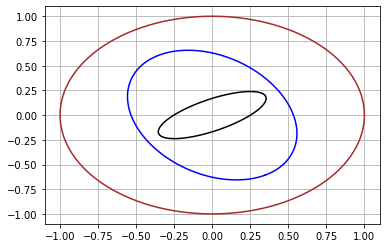

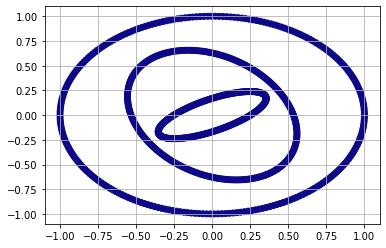

In [92]:
t = np.arange(0, 2*pi, 0.025)
a = [0.4, 0.7, 1]
b = [0.15, 0.5, 1]
alpha = [pi/6,-pi/3,0]
x = lambda t,n: a[n]*cos(t)*cos(alpha[n]) - b[n]*sin(t)*sin(alpha[n])
y = lambda t,n: a[n]*cos(t)*sin(alpha[n]) + b[n]*sin(t)*cos(alpha[n])

plt.plot([x(i,0) for i in t],[y(i,0) for i in t], 'black')
plt.plot([x(i,1) for i in t],[y(i,1) for i in t], 'blue')
plt.plot([x(i,2) for i in t],[y(i,2) for i in t], 'brown')
plt.grid(True)
plt.show()

df1 = pd.DataFrame({'x' : [x(i,0) for i in t], 'y' : [y(i,0) for i in t], 'target' : 0})
df2 = pd.DataFrame({'x' : [x(i,1) for i in t], 'y' : [y(i,1) for i in t], 'target' : 1})
df3 = pd.DataFrame({'x' : [x(i,2) for i in t], 'y' : [y(i,2) for i in t], 'target' : 2})

for idx, df in enumerate((df1, df2, df3)):
    plt.scatter(df.x, df.y, c= df.target, cmap=plt.cm.plasma)
    plt.grid(True)
plt.show()

In [125]:
train,valid,test = [],[],[]
for df in (df1, df2 ,df3):
    tr, v, te = split_df(df)
    train.append(tr)
    valid.append(v)
    test.append(te)
train,valid,test = pd.concat(train),pd.concat(valid),pd.concat(test)
len(train), len(valid), len(test)

(528, 159, 69)

In [126]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

In [127]:
y = pd.get_dummies(train['target'])
history = model.fit(train.iloc[:, :-1], y, epochs=1500, verbose=False, shuffle=True)
p = []

p.append(np.argmax(model.predict(train.iloc[:, :-1]), axis=-1))
print(accuracy_score(train['target'], p[-1]))

p.append(np.argmax(model.predict(test.iloc[:, :-1]), axis=-1))
print(accuracy_score(test['target'], p[-1]))

p.append(np.argmax(model.predict(valid.iloc[:, :-1]), axis=-1))
print(accuracy_score(valid['target'], p[-1]))

1.0
1.0
1.0


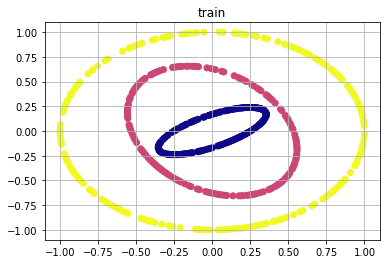

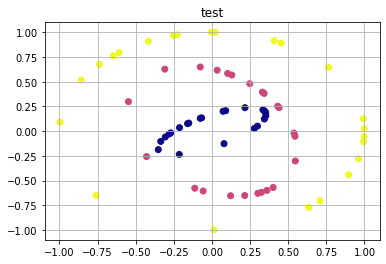

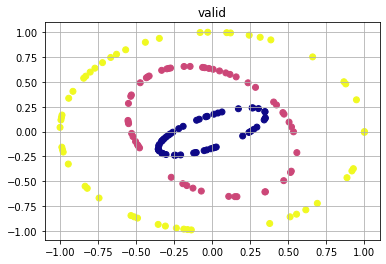

In [128]:
titles = ['train', 'test', 'valid']

for idx, df in enumerate((train, test, valid)):
    plt.scatter(df.x, df.y, c=p[idx], cmap=plt.cm.plasma)
    plt.grid(True)
    plt.title(titles[idx])
    plt.show()

In [129]:
hx = 0.05
hy = 0.05
grid_pred = [model.predict(np.array([[i, j]])).round(1) for i in np.arange(-1, 1, hx) for j in np.arange(-1, 1, hy)]

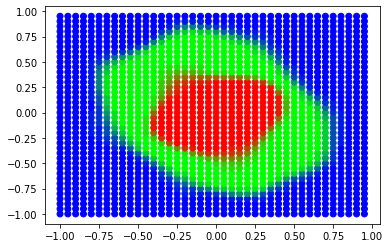

In [139]:
xx, yy = np.meshgrid(np.arange(-1, 1, hy), np.arange(-1, 1, hx))

rows = len(grid_pred)
colors = np.array(grid_pred).reshape((rows, 3))
colors.shape

plt.scatter(yy, xx, c=colors, cmap=plt.cm.plasma);
plt.show()

In [131]:
# Вторая часть ЛР

220


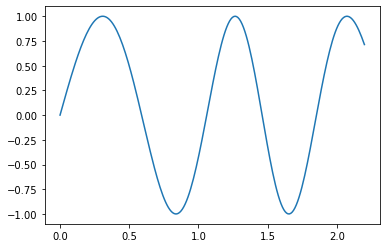

In [132]:
h = 0.01
t = np.linspace(0, 2.2, int(2.2/h), endpoint=True)
x = list(map(lambda t: sin(sin(t)* t**2 + 5*t), t))
plt.plot(t, x)
print(len(t))

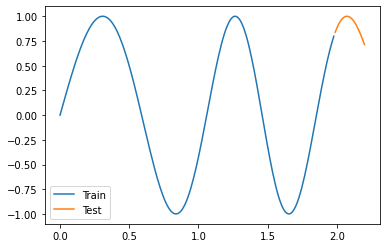

In [133]:
train_size = int(len(t) * 0.9)

X_train = t[:train_size]
y_train = x[:train_size]
plt.plot(X_train, y_train, label='Train')

X_test = t[train_size:]
y_test = x[train_size:]

plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

In [134]:
model = Sequential()
model.add(Dense(30, input_shape=(1,), activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [135]:
history = model.fit(X_train, y_train , epochs=600, verbose=0)

RMSE on train = 0.6366641091300838 
RMSE on test = 1.0410549202567765


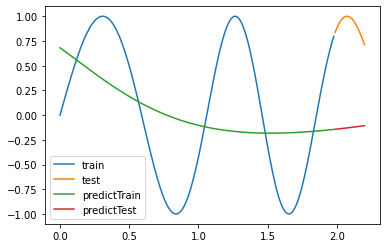

In [136]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model.predict(X_train[:])
mse = mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE on train = {np.sqrt(mse)} ')

pred_x = model.predict(X_test[:])
mse = mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE on test = {np.sqrt(mse)}')

plt.legend()
plt.show()

In [118]:
# Третья часть ЛР

In [119]:
model = Sequential()
model.add(Dense(5, input_shape=(1,), activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [120]:
history = model.fit(X_train, y_train , epochs=10000, verbose=0)

RMSE on train = 0.3744000684734947 
RMSE on test = 1.4166547134832703


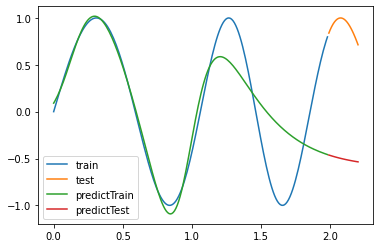

In [121]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model.predict(X_train[:])
mse = mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE on train = {np.sqrt(mse)} ')

pred_x = model.predict(X_test[:])
mse = mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE on test = {np.sqrt(mse)}')

plt.legend()
plt.show()

In [137]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(30,), max_iter = 1000, tol=0.00000001, activation='tanh', early_stopping=True, solver='lbfgs')
X_train_sk = [[i] for i in X_train]
y_train_sk = [[i] for i in y_train]

model.fit(np.array(X_train_sk), y_train)

MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=(30,),
             max_iter=1000, solver='lbfgs', tol=1e-08)

RMSE on train = 0.010111485123208929 
RMSE on test = 0.6593277103625163


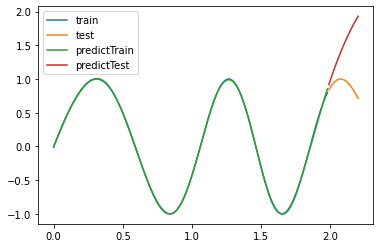

In [138]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model.predict(X_train_sk[:])
mse = mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE on train = {np.sqrt(mse)} ')

X_test_sk = [[i] for i in X_test]
pred_x = model.predict(X_test_sk[:])
mse = mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE on test = {np.sqrt(mse)}')

plt.legend()
plt.show()

# Выводы
Из данной лабораторной работы я вынес следующее: для нейросетей с малой размерностью входных данных, методы обучения первого порядка не дают хороший результат, тогда когда методы второго порядка почти мгновенно обучаются и не попадают в "плохой" локальный минимум.